##Introducción a k-Nearest Neighbors (kNN)

El algoritmo k-Nearest Neighbors (kNN) es un método de aprendizaje supervisado utilizado tanto para clasificación como para regresión.
Su principio básico es que los objetos similares están cerca entre sí en el espacio de características.

Cuando se desea predecir la clase de un nuevo dato, el modelo busca los k vecinos más cercanos en el conjunto de entrenamiento y asigna la clase más común entre ellos.

Es un algoritmo no paramétrico, lo que significa que no asume una forma específica de la función de distribución de los datos.


##Modelo matemático


Sea un conjunto de entrenamiento:


$$D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$$


donde:

- \( x_i \) son los vectores de características  
- \( y_i \) son las etiquetas de clase  

Para clasificar un nuevo punto \( x \):

1. Se calcula la **distancia** (usualmente euclidiana) entre \( x \) y todos los puntos del conjunto de entrenamiento:

$$
d(x, x_i) = \sqrt{\sum_{j=1}^p (x_j - x_{ij})^2}
$$

2. Se seleccionan los **k puntos más cercanos**.  
3. La clase asignada a \( x \) es la **más frecuente** entre esos vecinos.


Parámetros importantes:

n_neighbors: número de vecinos (k)

metric: tipo de distancia (por defecto 'minkowski')

weights: 'uniform' (todos los vecinos pesan igual) o 'distance' (más peso a los más cercanos)

Funciones principales:

fit(X, y): entrena el modelo

predict(X_new): predice la clase de nuevas observaciones

score(X_test, y_test): calcula la exactitud (accuracy)

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Convertir a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


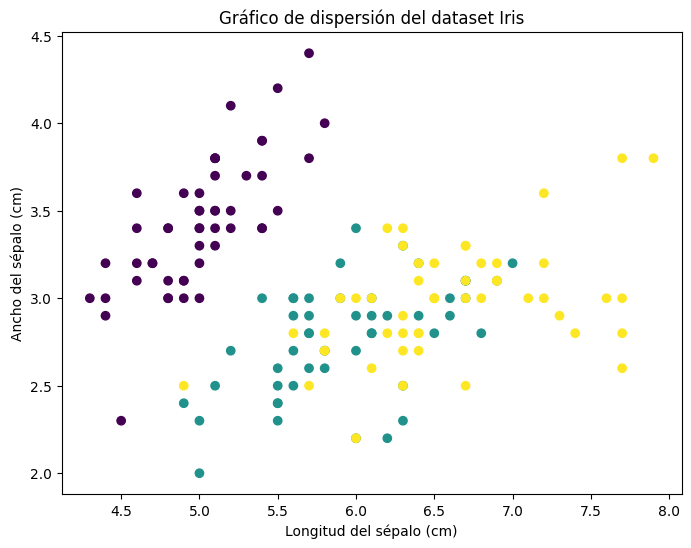

In [2]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'], cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Gráfico de dispersión del dataset Iris')
plt.show()



Seleccionamos las variables más relevantes (todas para este ejemplo) y normalizamos los datos para que todas las características tengan el mismo peso.

In [3]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Crear modelo con k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predicciones
y_pred = knn.predict(X_test)



In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Exactitud
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(acc, 3))

# Reporte de Clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



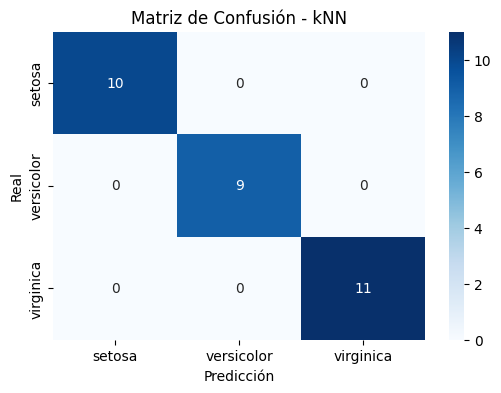

In [6]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - kNN')
plt.show()


Referencias bibliográficas (APA 7)

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O’Reilly Media.

Pedregosa, F. et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27.